In [ ]:
import os 
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D,Dropout, Resizing, Input, Normalization
from keras import Model
from keras.models import Sequential

from IPython import display


In [4]:
Data_path = ("data/")

data_dir = pathlib.Path(Data_path)

# Load the dataset
tf.keras.utils.get_file(
    'voicedataset.zip',
    origin='http://aiolearn.com/dl/datasets/voicedata.zip',
    extract=True,
    cache_dir='.', cache_subdir='data'
)

print("Dataset loaded successfully!")



178676098/178676098 [==============================] - 200s 1us/step
Dataset loaded successfully!


In [9]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[(commands != 'README.md') & (commands != 'voicedataset.zip')]
print("Commands: ", commands)

Commands:  ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


In [10]:
#making training and testing dataset
X_train, X_test = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both'
)
label_names = np.array(X_train.class_names)
print("Label names: ", label_names)


Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.
Label names:  ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


In [12]:
#squeexing the data
def squeeze(audio, labels):
    audio = tf.squeeze(audio, axis=-1)
    return audio, labels

X_train = X_train.map(squeeze, tf.data.AUTOTUNE)
X_test = X_test.map(squeeze, tf.data.AUTOTUNE)

In [13]:
X_train.element_spec

(TensorSpec(shape=(None, 16000), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

tf.Tensor(
[[-0.00894165 -0.01025391 -0.00894165 ... -0.01501465 -0.01254272
  -0.00900269]
 [-0.00131226 -0.00131226 -0.00137329 ... -0.00244141 -0.00189209
  -0.00152588]
 [-0.00015259  0.0020752   0.00039673 ... -0.00091553  0.00048828
   0.00057983]
 ...
 [ 0.          0.0007019   0.00048828 ... -0.00036621 -0.00021362
  -0.00024414]
 [ 0.00094604  0.00100708  0.00079346 ... -0.00186157 -0.00170898
  -0.00134277]
 [ 0.00125122  0.0017395   0.0017395  ... -0.00408936 -0.003479
  -0.00305176]], shape=(64, 16000), dtype=float32)
['right' 'yes' 'yes' 'go' 'stop' 'left' 'yes' 'up' 'down' 'right' 'right'
 'go' 'yes' 'down' 'go' 'left' 'right' 'yes' 'go' 'down' 'right' 'down'
 'stop' 'right' 'right' 'left' 'yes' 'go' 'down' 'up' 'up' 'yes' 'right'
 'stop' 'stop' 'up' 'yes' 'stop' 'up' 'down' 'go' 'up' 'yes' 'left' 'up'
 'left' 'yes' 'left' 'down' 'stop' 'up' 'no' 'stop' 'no' 'down' 'down'
 'right' 'go' 'up' 'left' 'right' 'up' 'left' 'down']


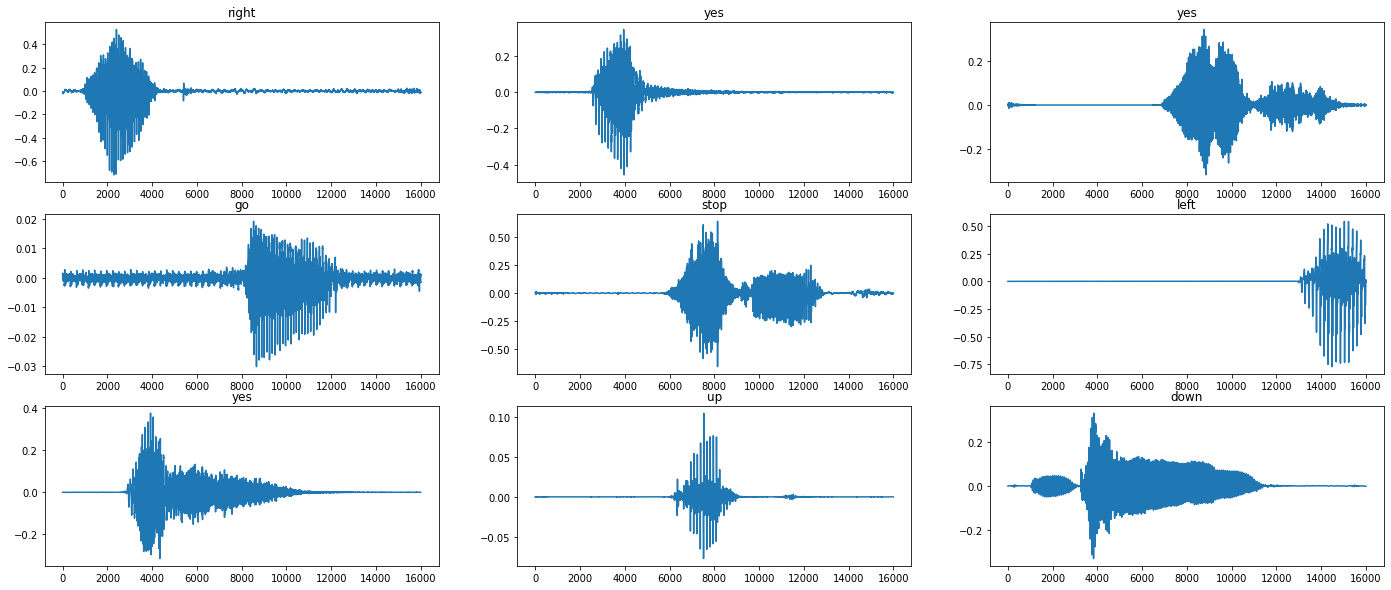

In [20]:
#seeing the data in one of our batches
for x, y in X_train.take(1):
    print(x)
    print(label_names[y])

#plotting the data
plt.figure(figsize=(24, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.plot(x[i].numpy())
    plt.title(label_names[y[i]])
plt.show()

In [17]:
#shape od the data
for x, y in X_train.take(1):
    print("Shape of x: ", x.shape)
    print("Shape of y: ", y.shape)

Shape of x:  (64, 16000)
Shape of y:  (64,)
